# Title: Did my model overfit?

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Data Generation

In [5]:
Npts = 100
Ndim = 100
X_train = np.random.normal(0, 1, (Npts, Ndim))
a0 = np.zeros(Ndim)
a0[[13, 26, 71]] = np.random.uniform(-1, 1, 3)
y0 = X_train @ a0
noise = np.random.normal(0, 1e-1, Npts)
Y_train = y0 + noise

X_test = np.random.normal(0, 1, (Npts, Ndim))
y0_test = X_test @ a0
Y_test = y0_test + np.random.normal(0, 1e-1, Npts)

In [6]:
def compute_weight(X, Y):
    return np.linalg.lstsq(X, Y, rcond=None)[0]

In [7]:
a = compute_weight(X_train, Y_train)

# Problem Statement
* As a data scientist, you are given an eqution `Y = a @ X` and you need to solve for `a` given `X` and `Y`.  `X` is in the shape of 100 x 100 where the sample size and dimensions are both 100. `a0` is the ground-truth model weights for the given `X` and `Y`. `Y` is the result of `a0 * X`. The `compute_weight` function is given and with that you can compute weights `a` with `X` and `Y`.


## Problem 1
* The following plot shows when you solve for `a` how it's different from your ground truth `a0`. Explain the graph.

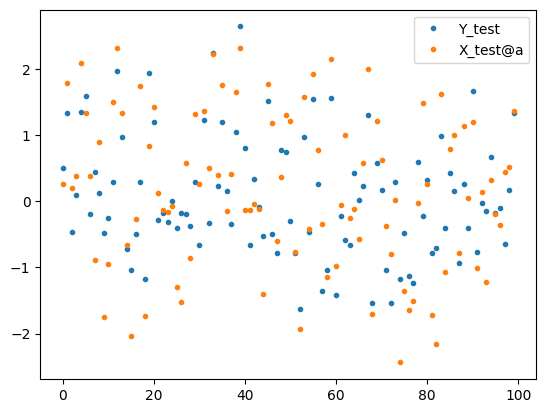

In [8]:
plt.plot(Y_test, ".", label='Y_test')
plt.plot(X_test @ a, ".", label='X_test@a')
plt.legend(loc=0)

## Problem 2
* How will you validate your explanation of `Problem 1`? Predict your model `a`'s error rate on unseen test data.

In [9]:
shuffled = np.random.choice(np.arange(Npts), Npts, replace=False)

In [10]:
def compute_mse(a, X, Y):
    return np.mean((X@a - Y)**2)

In [14]:
def k_fold_cross_validation(X, Y, k=3):
    # TODO
    a = compute_weight(X_train, Y_train)
    error = compute_mse(a, X_train, Y_train)
    pass


k_fold_cross_validation(X_train[shuffled], Y_train[shuffled])

* K-fold cross validation is **a resampling procedure used to evaluate machine learning models on a limited data sample.**
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png"  width="500" height="600">

# References
* https://scikit-learn.org/stable/_images/grid_search_cross_validation.png
* https://machinelearningmastery.com/k-fold-cross-validation/